In [1]:
# Lodz University of Technology
# 2022-23 Image Processing Assignment 8
# @Ahmet Galip Sengun - 904261
# November 2022

import skimage
import numpy as np
import matplotlib.pyplot as plt
import cv2

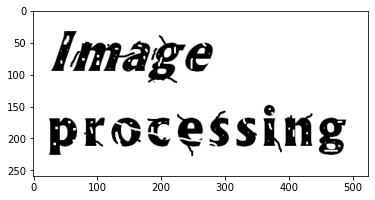

In [2]:
# Load image
ip = skimage.io.imread("image_processing.png")
ip = cv2.cvtColor(ip, cv2.COLOR_BGR2GRAY)
ip = ip.astype(np.uint8)
plt.imshow(ip, cmap = "gray")

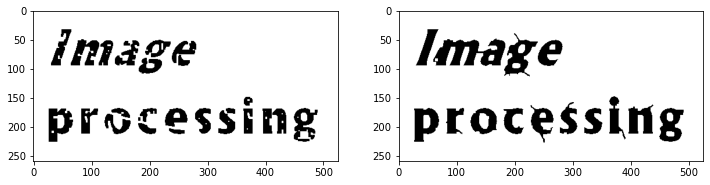

In [3]:
from skimage.morphology import binary_erosion, binary_dilation, disk, square, binary_closing, binary_opening

fig, ax = plt.subplots(1, 2, figsize = (12,8))

footprint = square(4)
closing = binary_closing(ip, footprint)

ax[0].imshow(closing, cmap = "gray")

footprint = square(5)
opening = binary_opening(ip, footprint)

ax[1].imshow(opening, cmap = "gray")

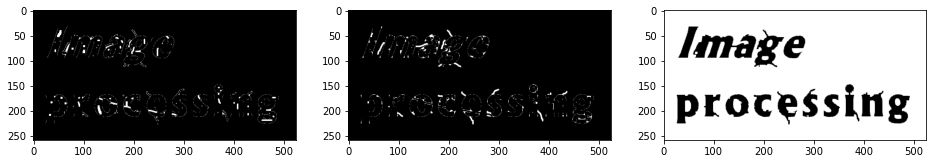

In [4]:
from skimage.util import compare_images
fig, ax = plt.subplots(1, 3, figsize = (16,4))

a1 = (compare_images(ip, opening, method = "diff")*255).astype(np.uint8)
ax[0].imshow(a1, cmap="gray")

a2 = (compare_images(ip, closing, method = "diff")*255).astype(np.uint8)
ax[1].imshow(a2, cmap="gray")

dif = ip - a1
ax[2].imshow(dif, cmap="gray")

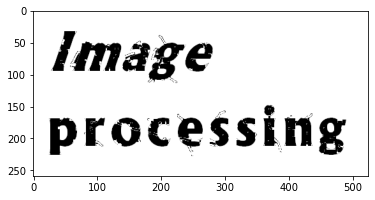

In [5]:
b = ip + a2 - a1
plt.imshow(b, cmap="gray")

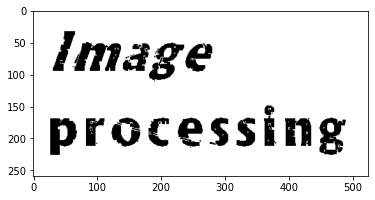

In [6]:
footprint = square(1)
b = binary_dilation(b, footprint)
b = binary_erosion(b, footprint)

plt.imshow(b, cmap="gray")

# Task 2

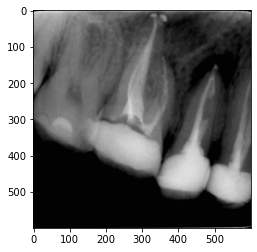

In [7]:
# Load image
teeth = skimage.io.imread("teeth.jpg").astype(np.uint8)
teeth = cv2.cvtColor(teeth, cv2.COLOR_BGR2GRAY)
plt.imshow(teeth, cmap = "gray")

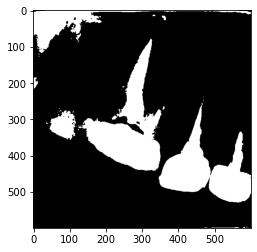

In [8]:
thresh = 120
binary = (teeth > thresh)*1
plt.imshow(binary, cmap = "gray")

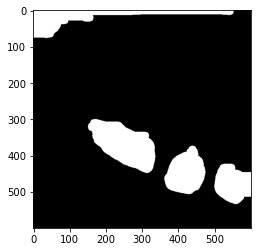

In [9]:
from skimage.morphology import rectangle, remove_small_objects
footprint = rectangle(4, 50)
tt = binary_erosion(binary, footprint)
rm = remove_small_objects(tt, 500)
footprint = disk(10)
dt = binary_dilation(rm, footprint)

plt.imshow(dt, cmap = "gray")

# Task 3

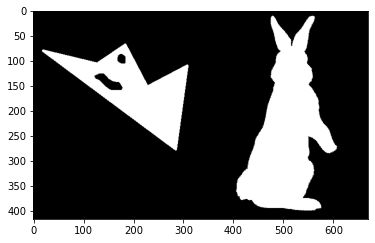

In [10]:
import skimage
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load image
two_objects = skimage.io.imread("two_objects.png")
plt.imshow(two_objects, cmap = "gray")

In [11]:
"""def PaintBucket(row, col, number):
    if two_objects[row, col] == 1 and label[row, col] == 0:
        label[row, col] = number
        
        if col-1 >= 0:
            PaintBucket(row, col-1, number)
            
        if col+1 < len(two_objects[0]):
            PaintBucket(row, col+1, number)
            
        if row-1 >= 0:
            PaintBucket(row-1, col, number)
            
        if row+1 < len(two_objects):
            PaintBucket(row+1, col, number)
        #print(f"true: {row} - {col}")  
        return True
    else:
        #print(f"false: {row} - {col}")
        return False"""

'def PaintBucket(row, col, number):\n    if two_objects[row, col] == 1 and label[row, col] == 0:\n        label[row, col] = number\n        \n        if col-1 >= 0:\n            PaintBucket(row, col-1, number)\n            \n        if col+1 < len(two_objects[0]):\n            PaintBucket(row, col+1, number)\n            \n        if row-1 >= 0:\n            PaintBucket(row-1, col, number)\n            \n        if row+1 < len(two_objects):\n            PaintBucket(row+1, col, number)\n        #print(f"true: {row} - {col}")  \n        return True\n    else:\n        #print(f"false: {row} - {col}")\n        return False'

In [12]:
"""label = np.zeros(shape=two_objects.shape)
current_label = 0

for i in np.ndindex(two_objects.shape[:2]):
    if two_objects[i] == 255 or label[i] ==0:
        current_label+=1
        if(PaintBucket(i[0], i[1], current_label) is False):
            current_label-=1"""

'label = np.zeros(shape=two_objects.shape)\ncurrent_label = 0\n\nfor i in np.ndindex(two_objects.shape[:2]):\n    if two_objects[i] == 255 or label[i] ==0:\n        current_label+=1\n        if(PaintBucket(i[0], i[1], current_label) is False):\n            current_label-=1'

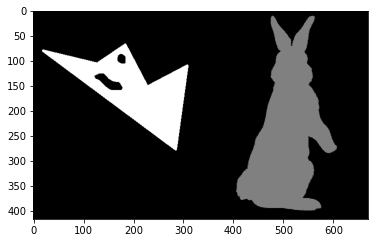

In [13]:
from skimage.measure import label
labeled = label(two_objects, background = 0, connectivity=2)
plt.imshow(labeled, cmap = "gray")

In [14]:
unique, counts = np.unique(labeled, return_counts=True)
dict(zip(unique, counts))

{0: 217555, 1: 38610, 2: 22555}

# Task 4

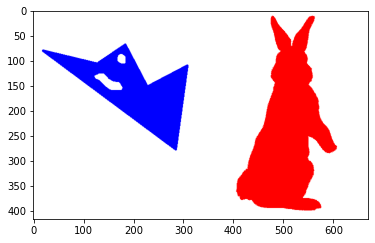

In [15]:
size = list(two_objects.shape) + [3]
coloured = np.zeros(size, dtype = np.uint8)
coloured.fill(255)

b1 = labeled == 1
b2 = labeled == 2

coloured[:,:,1] = coloured[:,:,1] + b1
coloured[:,:,2] = coloured[:,:,2] + b1

coloured[:,:,0] = coloured[:,:,0] + b2
coloured[:,:,1] = coloured[:,:,1] + b2


plt.imshow(coloured)

# Task 5

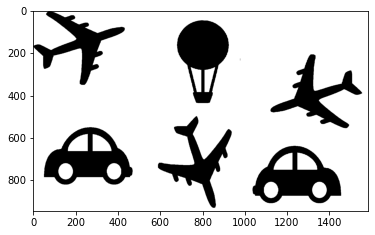

In [16]:
planes = skimage.io.imread("planes.png")
plt.imshow(planes, cmap = "gray")

In [17]:
from skimage.measure import euler_number, label, regionprops

label_img = label(planes, background=255, connectivity=2)
mask = skimage.morphology.remove_small_objects(label_img, 300)

regions = regionprops(mask)

euler_number(mask, connectivity=2)

-4

3


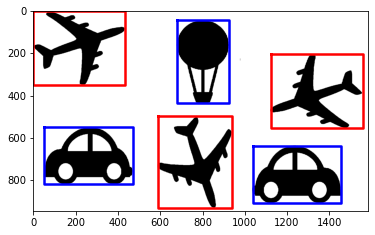

In [18]:
import math
fig, ax = plt.subplots()

ax.imshow(planes, cmap=plt.cm.gray)

ctr = 0
for props in regions:

    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    
    subreg = mask[minr:maxr, minc:maxc]
    e = euler_number(subreg, connectivity=2)
    
    if e == 1:
        ctr+=1
        ax.plot(bx, by, '-r', linewidth=2.5)
    else:
        ax.plot(bx, by, '-b', linewidth=2.5)

    

print(ctr)
plt.show()

In [19]:
def neighbor(i,j,label):
    # left
    left = label[i-1,j]
    # above
    above = label[i,j-1]
    neighbor_array = [left,above]
    return neighbor_array